# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Joevita Salsabila Fitrianova]
- **Email:** [joevitasalsabila@gmail.com]
- **ID Dicoding:** []

## Menentukan Pertanyaan Bisnis

- Apakah musim tertentu mempengaruhi jumlah penggunaan sepeda?
- Bagaimana cuaca yang berbeda mempengaruhi penggunaan sepeda dalam satu hari?
- Pada jam berapa penggunaan sepeda paling tinggi, dan apakah ada pola terkait waktu yang bisa diidentifikasi?
- Apakah suhu juga mempengaruhi jumlah penggunaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [2]:
# Mengimpor dataset day.csv dan hour.csv
df_day = pd.read_csv('day.csv')
df_hour = pd.read_csv('hour.csv')

In [3]:
#Melihat beberapa baris pertama pada data 
df_day.head()
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [19]:
df_day

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


**Insight:**
- Dari proses data gathering didapatkan informasi bahwa data mencakup berbagai faktor seperti waktu, cuaca, dan penggunaan sepeda yang memuat 731 baris dengan 15 kolom
- 

### Assessing Data

In [4]:
# Melihat statistik deskriptif dari data 
df_day.describe()
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Dari proses Accessing didapatkan informasi bahwa struktur data menunjukkan informasi penting tentang distribusi waktu (tanggal, jam), kondisi cuaca, dan jumlah pengguna
- Tidak ada missing values yang ditemukan, sehingga menunjukkan deskripsi data yang cukup jelas untuk dilakukan analisis lebih lanjut 

### Cleaning Data

In [5]:
# Memeriksa Missing Value 
df_day.isnull().sum()
df_hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
#Mengonversi Tipe Data pada kolom dteday
df_day['dteday'] = pd.to_datetime(df_day['dteday'])

In [7]:
#Menghapus kolom instant karena tidak diperlukan 
df_day.drop(columns=['instant'], inplace=True)

In [11]:
df_day.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Tidak ditemukan missing value pada data sehingga data dapat dianalisis lebih lanjut 
- Setelah memeriksa beberapa tipe data, terdapat salah satu kolom dengan tipe data yang kurang sesuai, sehingga dilakukan konversi tipe data pada kolom tersebut agar tipe data lebih sesuai
- Melakukan penghapusan kolom yang tidak relevan,seperti kolom instant agar data yang lebih mudah digunakan dan dianalisis 

## Exploratory Data Analysis (EDA)

### Explore ...

In [12]:
# Distribusi Pengguna Sepeda berdasarkan hari kerja vs akhir pekan dan musim
df_day.groupby(['workingday', 'season'])['cnt'].mean()

workingday  season
0           1         2257.098361
            2         5142.428571
            3         5474.666667
            4         4606.210526
1           1         2780.541667
            2         4926.664062
            3         5718.114504
            4         4785.611570
Name: cnt, dtype: float64

In [13]:
# Pengaruh suaca terhadap penggunaan sepeda 
df_day.groupby('weathersit')['cnt'].mean()

weathersit
1    4876.786177
2    4035.862348
3    1803.285714
Name: cnt, dtype: float64

weekday  workingday
0        0             177.468825
1        0             166.960784
         1             186.568332
2        0              44.043478
         1             192.632099
3        0             308.458333
         1             189.981640
4        0              81.666667
         1             198.710277
5        0             135.291667
         1             197.333333
6        0             190.209793
Name: cnt, dtype: float64

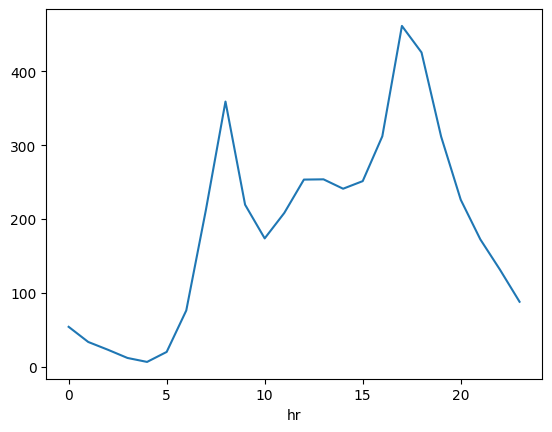

In [14]:
# Analisis tren penggunaan sepeda berdasarkan jam, hari dalam seminggu, dan bulan
df_hour.groupby('hr')['cnt'].mean().plot(kind='line')

# Analisis pola penggunaan sepeda pada hari kerja dibandingkan akhir pekan
df_hour.groupby(['weekday', 'workingday'])['cnt'].mean()

**Insight:**
- Pada distribusi penggunaan sepeda dapat diketahui bahwa penggunaan sepeda lebih tinggi di hari kerja, mungkin hal tersebut dikarenakan orang-orang menggunakan sepeda untuk bekerja. Musim dengan cuaca yang lebih baik juga dapat mendukung penggunaan sepeda yang lebih tinggi.
- Setelah dilakukan analisis pengaruh cuaca terhadap penggunaan sepeda dapat dilihat bahwa cuaca yang cerah atau berawan ringan (weathersit = 1) memiliki rata-rata pengguna sepeda yang jauh lebih tinggi dibandingkan cuaca buruk, seperti hujan atau salju (weathersit = 3 atau 4), sehingga dapat dikatakan pengguna lebih cenderung menggunakan sepeda saat cuaca mendukung. Cuaca buruk sangat mengurangi jumlah pengguna sepeda.
- Mencoba melakukan analisis tren terhadap waktu dan dapat dilihat pada plot bahwa penggunaan sepeda meningkat drastis selama jam sibuk (pagi sekitar pukul 8 dan sore sekitar pukul 17). Dimana hal ini menunjukkan pola penggunaan sepeda yang terkait dengan perjalanan kerja. Sehingga penggunaan sepeda memuncak pada jam-jam ketika orang-orang pergi atau pulang kerja, menegaskan sepeda sebagai moda transportasi utama. 

## Visualization & Explanatory Analysis

### Apakah musim tertentu mempengaruhi jumlah penggunaan sepeda?

Text(0.5, 1.0, 'Penggunaan Sepeda Berdasarkan Musim')

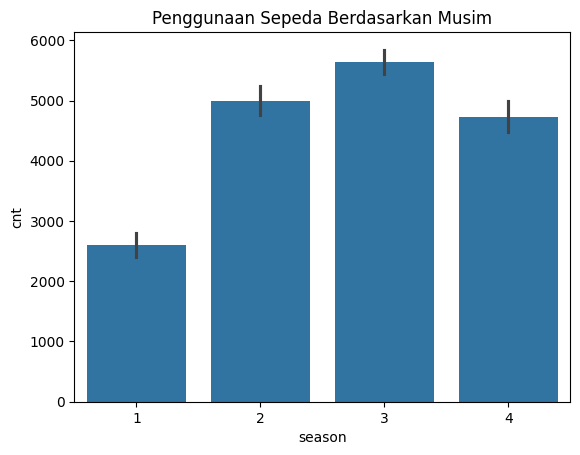

In [15]:
sns.barplot(x='season', y='cnt', data=df_day)
plt.title('Penggunaan Sepeda Berdasarkan Musim')

### Bagaimana cuaca yang berbeda mempengaruhi penggunaan sepeda dalam satu hari?

Text(0.5, 1.0, 'Distribusi Penggunaan Sepeda Berdasarkan Cuaca')

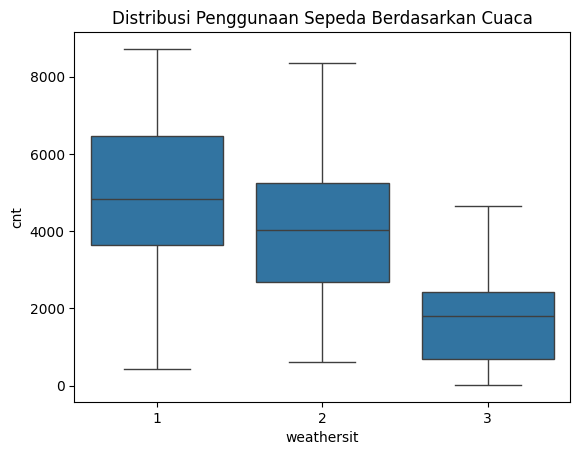

In [16]:
sns.boxplot(x='weathersit', y='cnt', data=df_day)
plt.title('Distribusi Penggunaan Sepeda Berdasarkan Cuaca')

### Pada jam berapa penggunaan sepeda paling tinggi, dan apakah ada pola terkait waktu yang bisa diidentifikasi?

Text(0, 0.5, 'Rata-rata Penggunaan Sepeda')

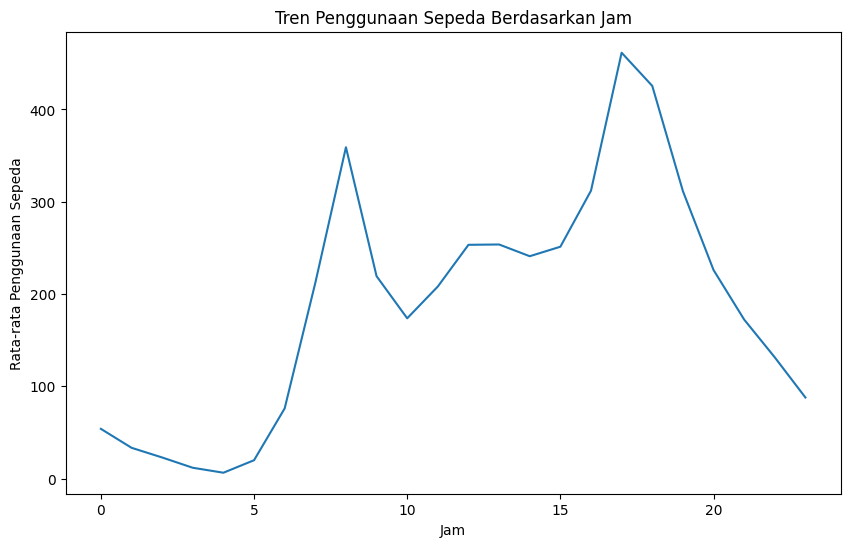

In [17]:
df_hour.groupby('hr')['cnt'].mean().plot(kind='line', figsize=(10,6))
plt.title('Tren Penggunaan Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Penggunaan Sepeda')

### Apakah suhu juga mempengaruhi jumlah penggunaan sepeda?

Text(0, 0.5, 'Jumlah Penggunaan Sepeda')

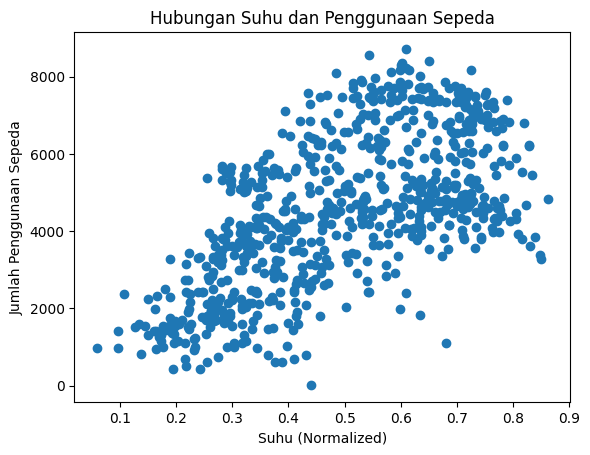

In [18]:
plt.scatter(df_day['temp'], df_day['cnt'])
plt.title('Hubungan Suhu dan Penggunaan Sepeda')
plt.xlabel('Suhu (Normalized)')
plt.ylabel('Jumlah Penggunaan Sepeda')

**Insight:**
- Musim mempengaruhi penggunaan sepeda dimana dari hasil analisis didapatkan bahwa penggunaan sepeda lebih tinggi di musim panas dan musim gugur. Musim dingin memiliki jumlah pengguna yang lebih rendah, mungkin hal tersebut dikarenakan kondisi cuaca yang lebih dingin dan kurang mendukung. Sehingga dari data dan visualisasi yang dilakukan dapat dilihat bahwa musim sangat mempengaruhi pola penggunaan sepeda, yakni penggunaan lebih tinggi pada musim dengan cuaca hangat.
- Dari hasil visualisasi data yang dilakukan dapat dikatakan cuaca cerah atau sedikit berawan menghasilkan distribusi penggunaan sepeda yang lebih tinggi. Dimana hujan dan salju secara signifikan menurunkan jumlah pengguna. Cuaca adalah faktor penting dalam penggunaan sepeda, ketika cuaca buruk maka jumlah pengguna menurun secara signifikan.
- Dari plot yang ditunjukkan pola jam menunjukkan penggunaan sepeda yang lebih tinggi pada jam-jam sibuk, terutama di pagi dan sore hari saat orang pergi dan pulang kerja. Penggunaan sepeda memiliki keterkaitan yang kuat dengan pola perjalanan harian, terutama bagi pekerja di jam sibuk. Hal tersebut mengindikasikan bahwa banyak orang menggunakan sepeda untuk perjalanan harian ke dan dari tempat kerja.
- Selain tiga hal di atas suhu juga mempengaruhi jumlah penggunaan sepeda, dimana semakin tinggi suhu (dalam batas wajar), semakin tinggi penggunaan sepeda. Suhu ekstrem, baik terlalu panas maupun terlalu dingin, mengurangi jumlah pengguna. Suhu sedang lebih mendukung penggunaan sepeda, sedangkan suhu ekstrem menurunkan jumlah pengguna, mengindikasikan kenyamanan menjadi faktor utama dalam keputusan menggunakan sepeda.

## Conclusion

1. Analisis musim dan cuaca : penggunaan sepeda lebih tinggi di musim panas dan saat cuaca cerah. Sehingga cuaca buruk seperti hujan atau salju mengurangi jumlah pengguna.

2. Analisis pola waktu : penggunaan sepeda memuncak di jam sibuk pagi dan sore, terutama pada hari dan jam kerja, dimana sepeda banyak digunakan untuk perjalanan kerja.

3. Analisis pengaruh suhu : suhu moderat mendorong lebih banyak pengguna, sedangkan suhu ekstrem (terlalu panas atau dingin) menurunkan penggunaan sepeda.